In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
file_path = 'C:/Users/Gina/Pictures/md/heart_attack_prediction_indonesia.csv'
data = pd.read_csv(
    file_path,
    sep = ',',
    na_values = "."
)

print(f"Originally we have {data.shape[0]} samples and {data.shape[1]} features.")  # Shape returns (nº samples, nº features)
#print(data.describe())
#data.head()

n_samples = 20000
df = data.sample(n=n_samples)
print(f"For this project we have {df.shape[0]} samples and {df.shape[1]} features.")
print(df.describe())
df.head()

Originally we have 158355 samples and 28 features.
For this project we have 20000 samples and 28 features.
                age  hypertension      diabetes  cholesterol_level  \
count  20000.000000  20000.000000  20000.000000       20000.000000   
mean      54.466150      0.291850      0.203050         200.057500   
std       11.803365      0.454625      0.402279          40.033651   
min       25.000000      0.000000      0.000000         100.000000   
25%       46.000000      0.000000      0.000000         172.000000   
50%       54.000000      0.000000      0.000000         200.000000   
75%       62.000000      1.000000      0.000000         227.000000   
max       90.000000      1.000000      1.000000         350.000000   

            obesity  waist_circumference  family_history   sleep_hours  \
count  20000.000000          20000.00000    20000.000000  20000.000000   
mean       0.250600             93.40020        0.299900      6.479355   
std        0.433369             16.36563

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
111198,34,Male,Urban,Middle,1,0,181,0,95,1,...,68,136,35,154,122,Normal,1,0,1,1
15637,50,Female,Urban,Low,0,1,221,0,100,1,...,87,74,42,132,182,Abnormal,0,1,0,0
100508,80,Female,Urban,Low,1,0,202,0,83,0,...,93,130,56,121,222,Abnormal,0,1,0,0
110470,52,Female,Urban,Middle,0,1,184,1,87,1,...,83,73,47,153,151,Normal,0,0,1,0
48930,68,Male,Urban,Middle,0,0,210,0,77,0,...,72,70,41,118,181,Normal,0,1,1,0


## Uni-variate Descriptive Analysis

In [25]:
df.describe(include = "all")

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,20000.000000,20000,20000,20000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000,20000.00000,20000.000000,20000.000000,20000.000000
unique,NaN,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,Male,Urban,Middle,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN
freq,NaN,10241,12982,9023,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16029,NaN,NaN,NaN,NaN
mean,54.466150,NaN,NaN,NaN,0.291850,0.203050,200.057500,0.250600,93.40020,0.299900,...,79.422650,110.525250,49.527050,129.76505,149.585650,NaN,0.20115,0.498200,0.604100,0.401000
std,11.803365,NaN,NaN,NaN,0.454625,0.402279,40.033651,0.433369,16.36563,0.458225,...,9.971985,27.566401,10.004378,34.97145,49.049758,NaN,0.40087,0.500009,0.489055,0.490113
min,25.000000,NaN,NaN,NaN,0.000000,0.000000,100.000000,0.000000,29.00000,0.000000,...,37.000000,70.000000,8.000000,-4.00000,50.000000,NaN,0.00000,0.000000,0.000000,0.000000
25%,46.000000,NaN,NaN,NaN,0.000000,0.000000,172.000000,0.000000,82.00000,0.000000,...,73.000000,89.000000,43.000000,106.00000,115.000000,NaN,0.00000,0.000000,0.000000,0.000000
50%,54.000000,NaN,NaN,NaN,0.000000,0.000000,200.000000,0.000000,93.00000,0.000000,...,79.000000,109.000000,50.000000,130.00000,149.000000,NaN,0.00000,0.000000,1.000000,0.000000
75%,62.000000,NaN,NaN,NaN,1.000000,0.000000,227.000000,1.000000,104.00000,1.000000,...,86.000000,129.000000,56.000000,153.00000,183.000000,NaN,0.00000,1.000000,1.000000,1.000000


## Boxplots and histogramas


List of column names: ['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes', 'cholesterol_level', 'obesity', 'waist_circumference', 'family_history', 'smoking_status', 'alcohol_consumption', 'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides', 'EKG_results', 'previous_heart_disease', 'medication_usage', 'participated_in_free_screening', 'heart_attack']


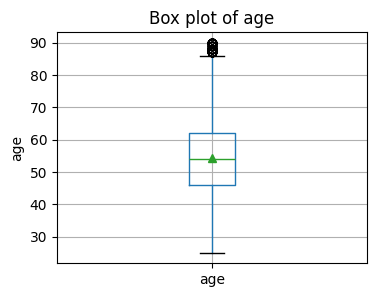

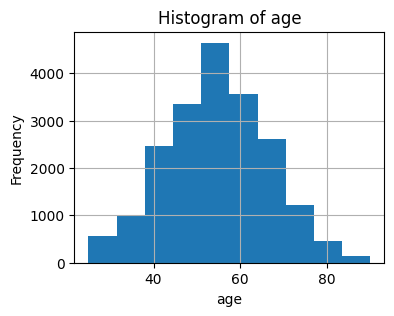

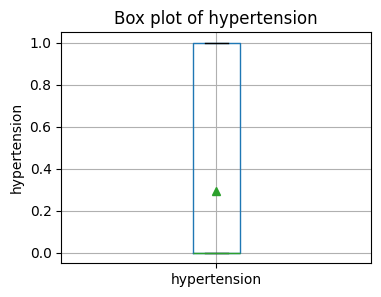

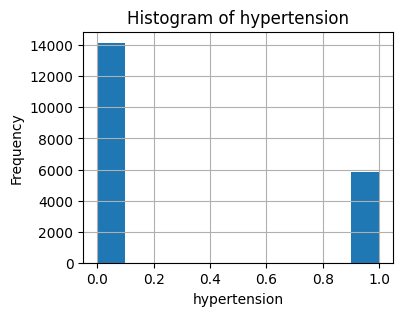

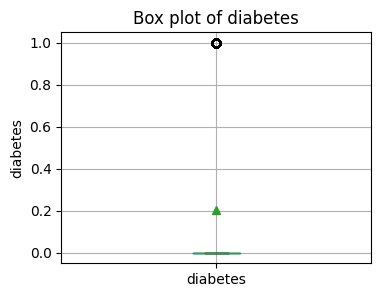

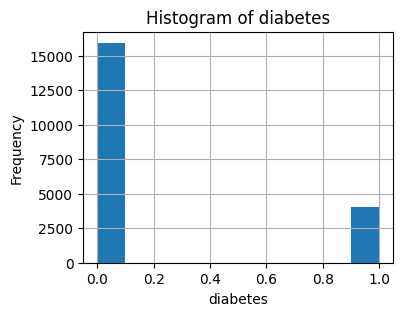

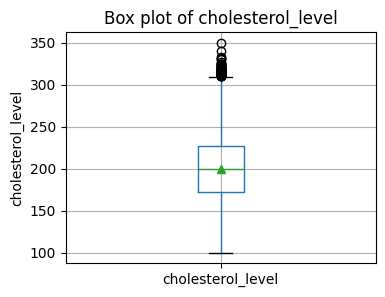

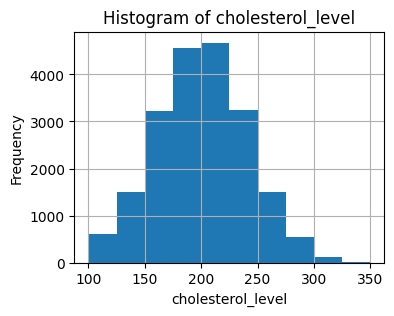

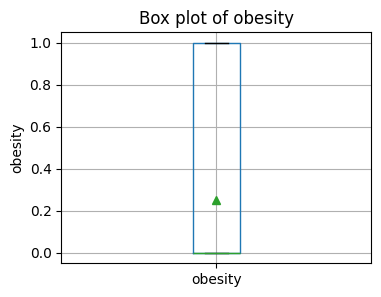

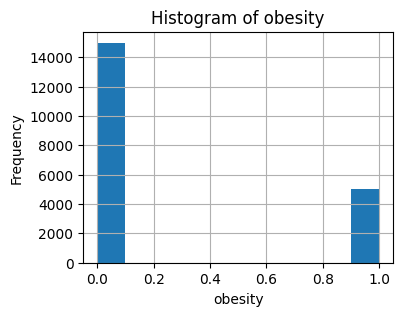

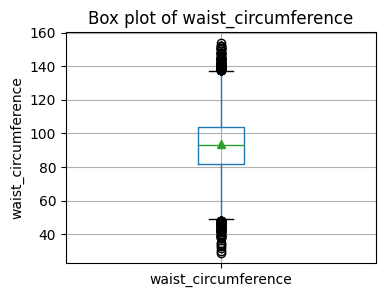

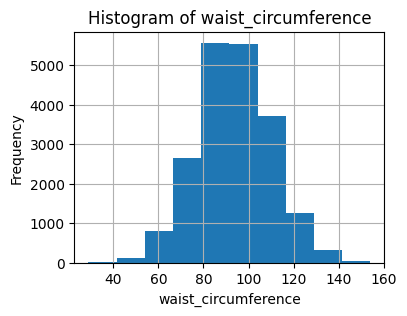

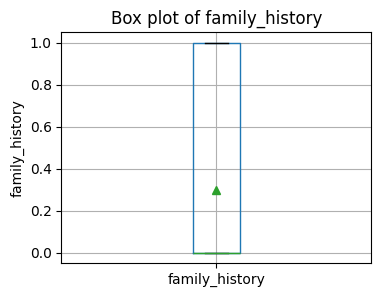

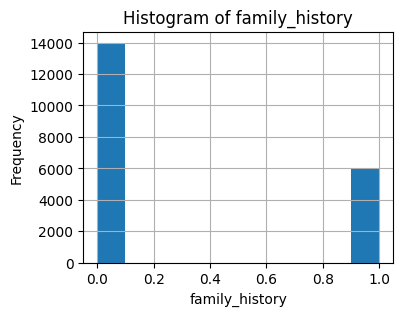

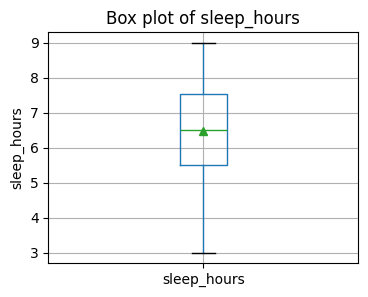

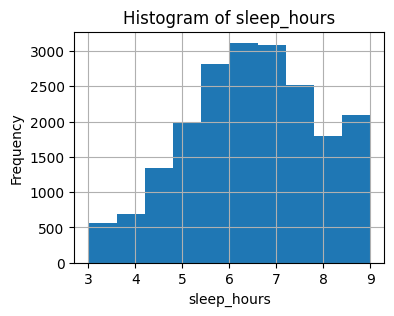

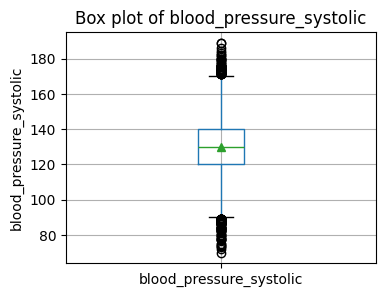

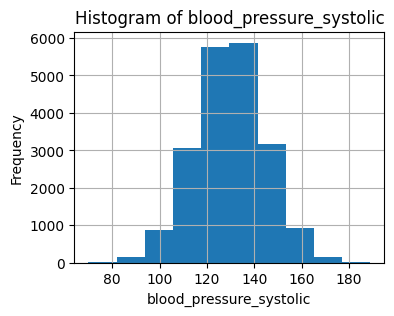

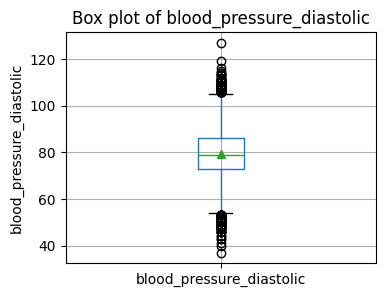

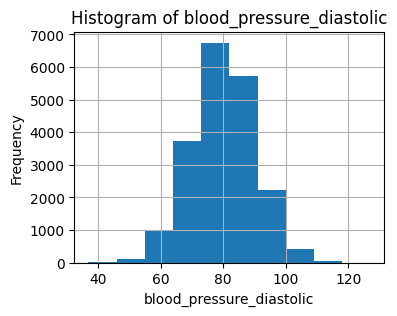

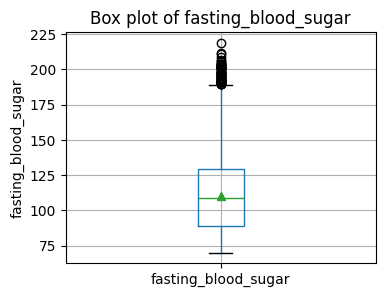

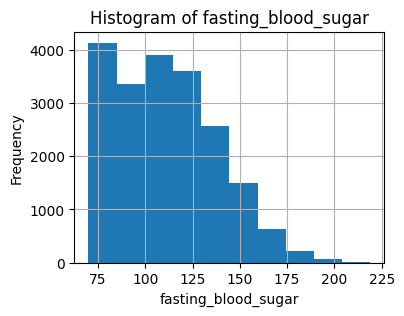

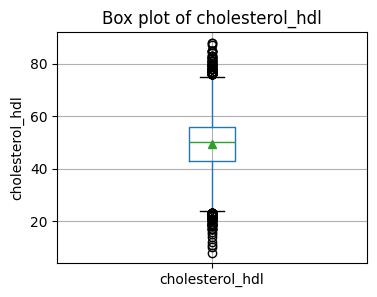

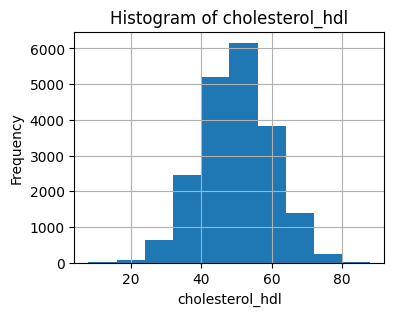

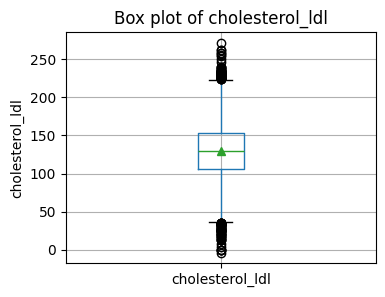

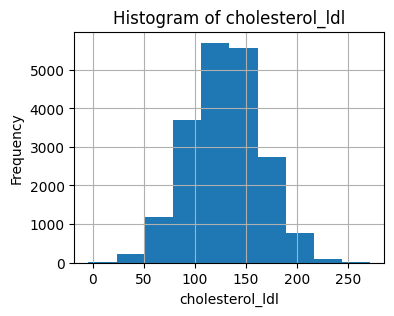

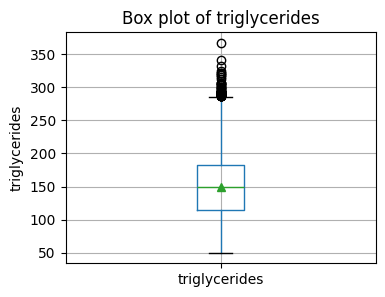

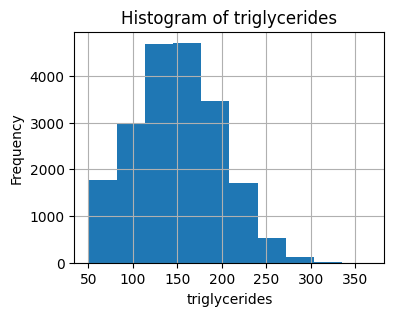

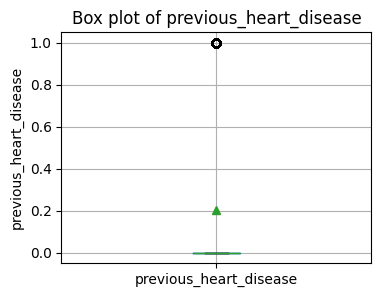

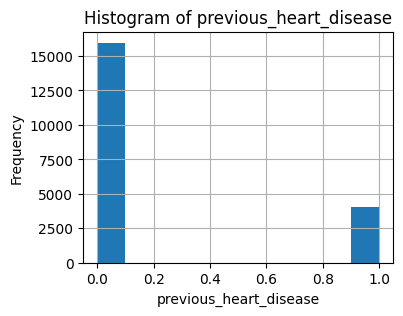

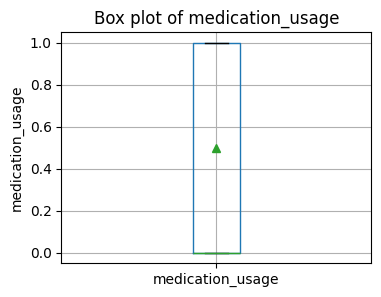

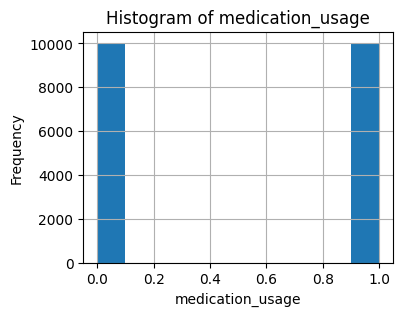

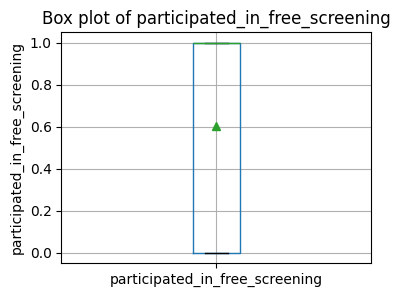

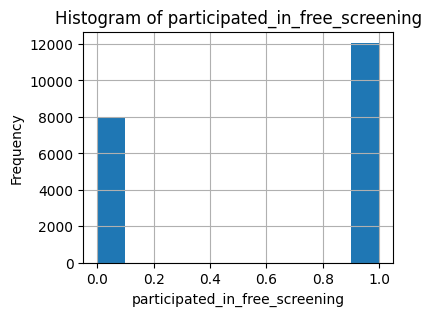

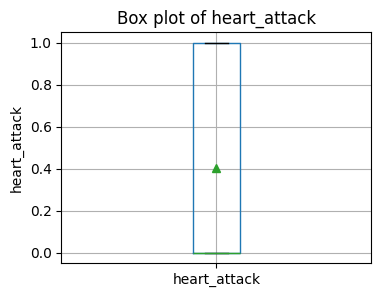

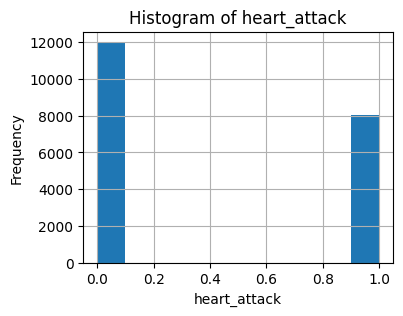

In [39]:
column_names_list = df.columns.tolist()
print("List of column names:", column_names_list)

numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

for column in numerical_columns:
    # Boxplot
    plt.figure(figsize=(4, 3))
    df.boxplot(
        column=[column],
        meanline=False,
        showmeans=True,
        return_type="dict"
    )
    plt.title(f"Box plot of {column}")
    plt.ylabel(column)
    plt.show()

    # Histogram
    plt.figure(figsize=(4, 3))
    df[column].hist(bins=10)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
data.corr(method = "pearson")